In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/new-site.csv', sep='\t')
df

,site,dwell-time
0,0,2
1,1,48
2,0,15
3,1,16
4,0,38
...,...,...
295,0,22
296,0,7
297,1,144
298,0,89


In [9]:
df[df['site']==0].mean().round(0)

site           0.0
dwell-time    91.0
dtype: float64

In [10]:
df[df['site']==1].mean().round(0)

site           1.0
dwell-time    88.0
dtype: float64

Text(0.5, 1.0, 'Распределение времени на сайте в группе B')

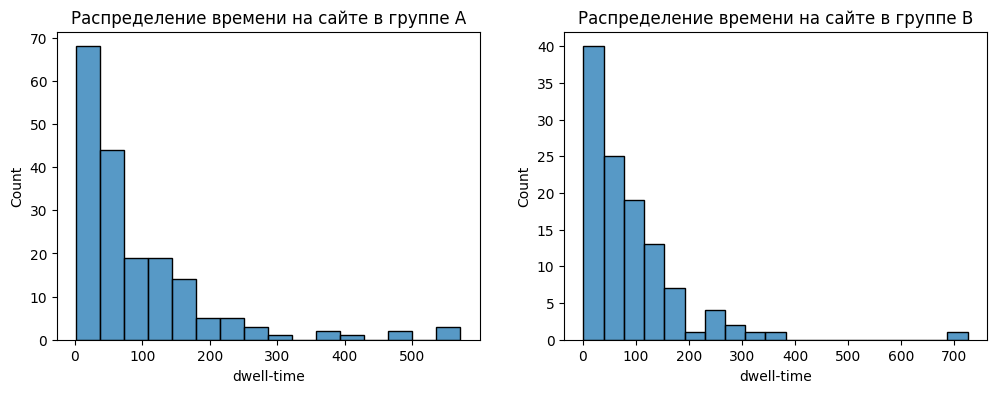

In [18]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(data=df[df['site']==0]['dwell-time'], ax=axes[0])
sns.histplot(data=df[df['site']==1]['dwell-time'], ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А')
axes[1].set_title('Распределение времени на сайте в группе B')

In [ ]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(df[df['site']==0]['dwell-time'])
shapiro_result_b = shapiro(df[df['site']==1]['dwell-time'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [19]:
from scipy.stats import ttest_ind
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df[df['site']==0]['dwell-time'], df[df['site']==1]['dwell-time'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df)


*** Результаты независимого T-теста ***
0.81 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Распределения в обеих группах нормальные
